<a href="https://colab.research.google.com/github/Naman-Kapoor26/BALL-BEARING-FAULT-DETECTION/blob/main/ML_Time_Domain_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Time domain features are maximum value of signal, minimum value of the signal, root mean square (RMS) value, or statistical features such as skewness, kurtosis, etc. <br>
We obtain time domain feature of this data from [Kaggle](https://www.kaggle.com/datasets/brjapon/cwru-bearing-datasets?select=feature_time_48k_2048_load_1.csv)

In [3]:
data_time = pd.read_csv("/content/feature_time_domain.csv")

In [4]:
data_time['fault'] = pd.Categorical(data_time['fault'])

Divide the into training and test set.

In [67]:
train_data, test_data = train_test_split(data_time, test_size = 750, stratify = data_time['fault'],
                                         random_state = 42)

Before applying ML, it is always a better idea to scale the data.

In [6]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])

In [19]:
test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)

# SVM

In [60]:
from sklearn.svm import SVC
SVCClf = SVC(kernel = 'poly')
SVCClf.fit(train_data_scaled, train_data['fault'])

SVC(kernel='poly')

Now we will used the best model to find test accuracy.

In [61]:
train_predictions = SVCClf.predict(train_data_scaled)
test_predictions = SVCClf.predict(test_data_scaled)

In [62]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

Train confusion matrix.

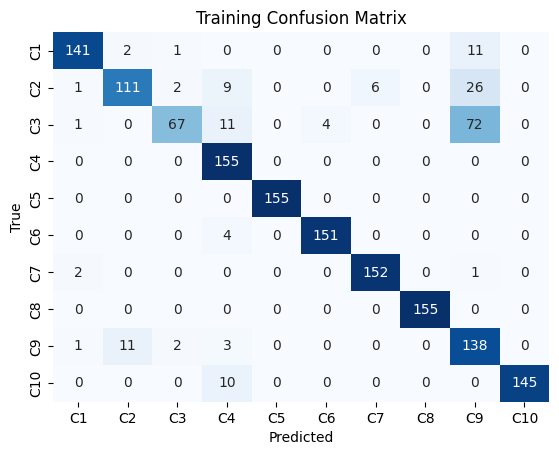

In [72]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test confusion matrix.

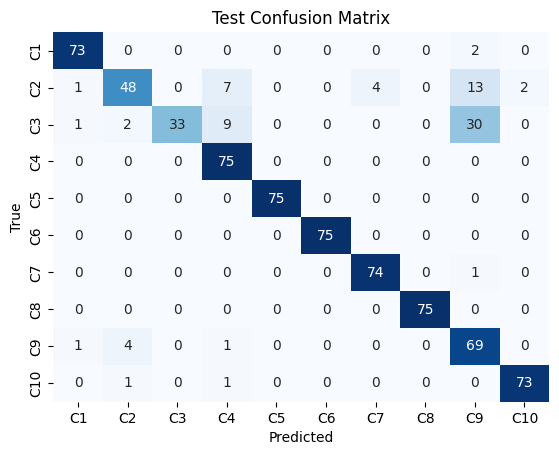

In [71]:
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#KNN

In [66]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.8933333333333333


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors= 5, n_jobs= -1)
knn_clf.fit(train_data.iloc[:,:-1], train_data['fault'])
train_predictions = knn_clf.predict(train_data.iloc[:,:-1])
test_predictions = knn_clf.predict(test_data.iloc[:,:-1])

In [77]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  0.915483870967742


In [78]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

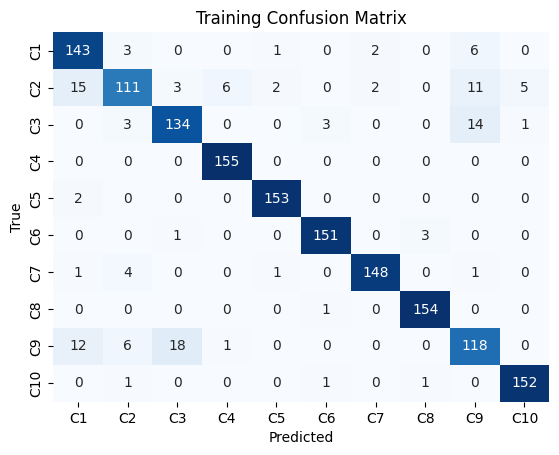

In [79]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


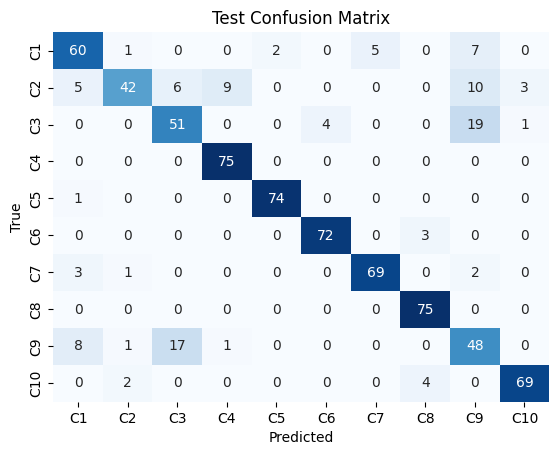

In [80]:
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [81]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.8466666666666667


#Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_data.iloc[:,:-1], train_data['fault'])
train_predictions = gnb.predict(train_data.iloc[:,:-1])
test_predictions = gnb.predict(test_data.iloc[:,:-1])


In [84]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  0.9245161290322581


In [85]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

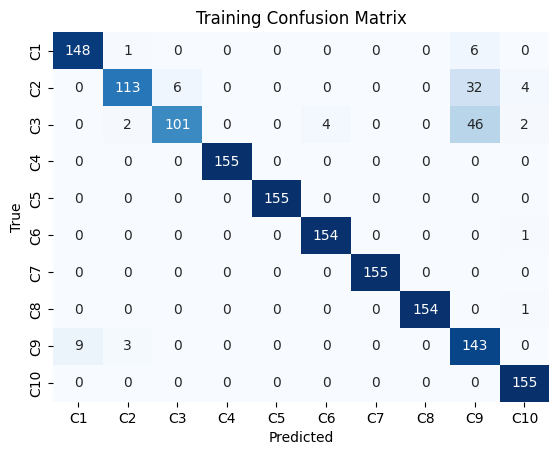

In [86]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

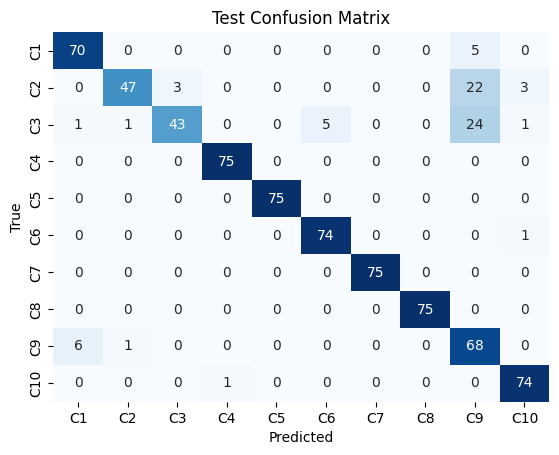

In [87]:
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [88]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9013333333333333


# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier()
dtclf.fit(train_data.iloc[:,:-1], train_data['fault'])
train_predictions = dtclf.predict(train_data.iloc[:,:-1])
test_predictions = dtclf.predict(test_data.iloc[:,:-1])

In [90]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  1.0


In [91]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

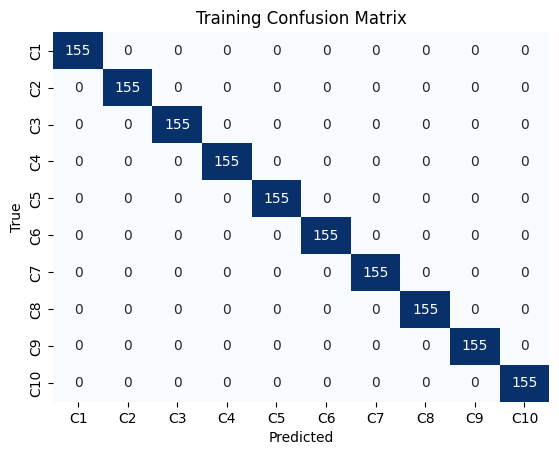

In [92]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

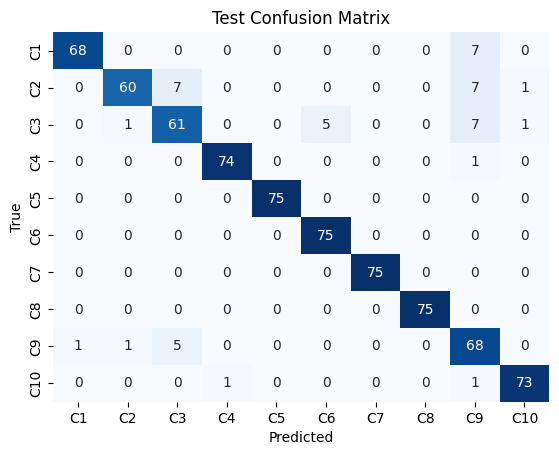

In [93]:
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [94]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9386666666666666


#Bagging

In [101]:
from sklearn.ensemble import BaggingClassifier
bagclf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=5, random_state=0)
bagclf.fit(train_data.iloc[:,:-1], train_data['fault'])
train_predictions = bagclf.predict(train_data.iloc[:,:-1])
test_predictions = bagclf.predict(test_data.iloc[:,:-1])


In [102]:
overall_train_accuracy = accuracy_score(train_data['fault'], train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  0.9935483870967742


In [103]:
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)

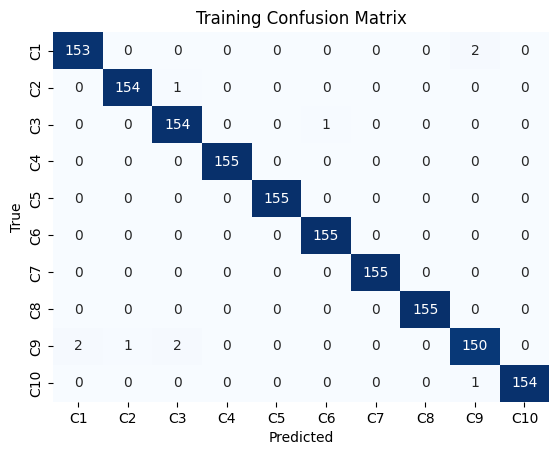

In [104]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

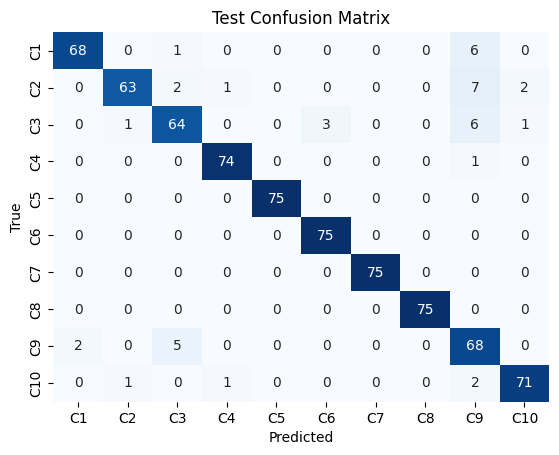

In [105]:
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [106]:
overall_test_accuracy = accuracy_score(test_data['fault'], test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.944
